In [1]:
import torch
from d2l import torch as d2l

In [2]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [5]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

# notice that every element in the returned array is the softmax element

In [4]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2049, 0.1615, 0.1429, 0.2711, 0.2196],
         [0.2200, 0.2291, 0.1970, 0.1767, 0.1772]]),
 tensor([1., 1.]))

In [6]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [7]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

In [8]:
# the cross-entropy loss
# takes the negative log-likelihood of the predicted probability assigned to the true label

In [14]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

# slicing format
# [0, 0] and [1, 2]

tensor([0.1000, 0.5000])

In [15]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [16]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

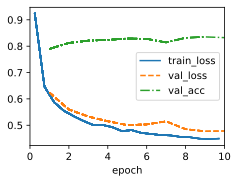

In [17]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [18]:
# epoch: one full pass through training dataset by the model

In [19]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

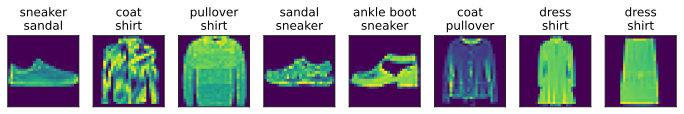

In [20]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

In [21]:
# above are the ones that the model labeled incorrectly

In [32]:
"""
exercises
1.1. 100 becomes nan. too big overflow likely
1.2. yes all real numbers. it does break later on
1.3. WIP

2.1. 

3. most likely label is best estimation, but not necessarily always correct. for medical diagonsis, try to be
more sure before confirmation in sensitive situations
4. if there are so many words in the vocab, the number of nodes in the output layer will be very big
it will also make it less able to differentiate amongst the softmax with less spiky results so there may be 10 competing words with about the
same softmax value
5. 
"""

'\nexercises\n1.1. 100 becomes nan. too big overflow likely\n1.2. yes all real numbers. it does break later on\n1.3. WIP\n\n2.1. \n\n3. most likely label is best estimation, but not necessarily always correct. for medical diagonsis, try to be\nmore sure before confirmation in sensitive situations\n4. if there are so many words in the vocab, the number of nodes in the output layer will be very big\nit will also make it less able to differentiate amongst the softmax with less spiky results so there may be 10 competing words with about the\nsame softmax value\n5. \n'

In [26]:
TEST = torch.tensor([[100, 1, 1, 1]])
softmax(TEST)

tensor([[nan, 0., 0., 0.]])

In [27]:
TEST1 = torch.tensor([[-101, -102, -103, -104]])
softmax(TEST1)

tensor([[0.6667, 0.2667, 0.0667, 0.0000]])

In [30]:
TEST2 = torch.tensor([[-200, -500, -10000]])
softmax(TEST2)
# clearly too small

tensor([[nan, nan, nan]])

In [31]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

# implement a fix WIP